Input Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb


Input CSV file

In [2]:
df = pd.read_csv('/content/diabetes.csv')

Read CSV file by DF

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Show Shape Dataset

In [4]:
df.shape

(768, 9)

Outcome Value Count

In [11]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


Outcome Value SNS in Graph

<Axes: ylabel='count'>

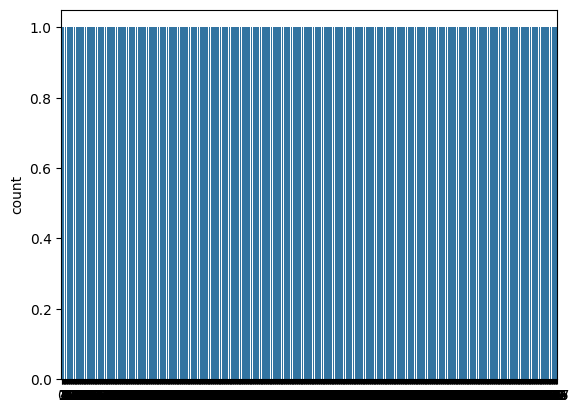

In [12]:
sns.countplot(df['Outcome'])

Describe Dataset

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Read Head of Dataset

In [14]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Check Null value

In [16]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [17]:
df.isnull().sum().sort_values(ascending=False).head(10)

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Show null value Graph

<Axes: >

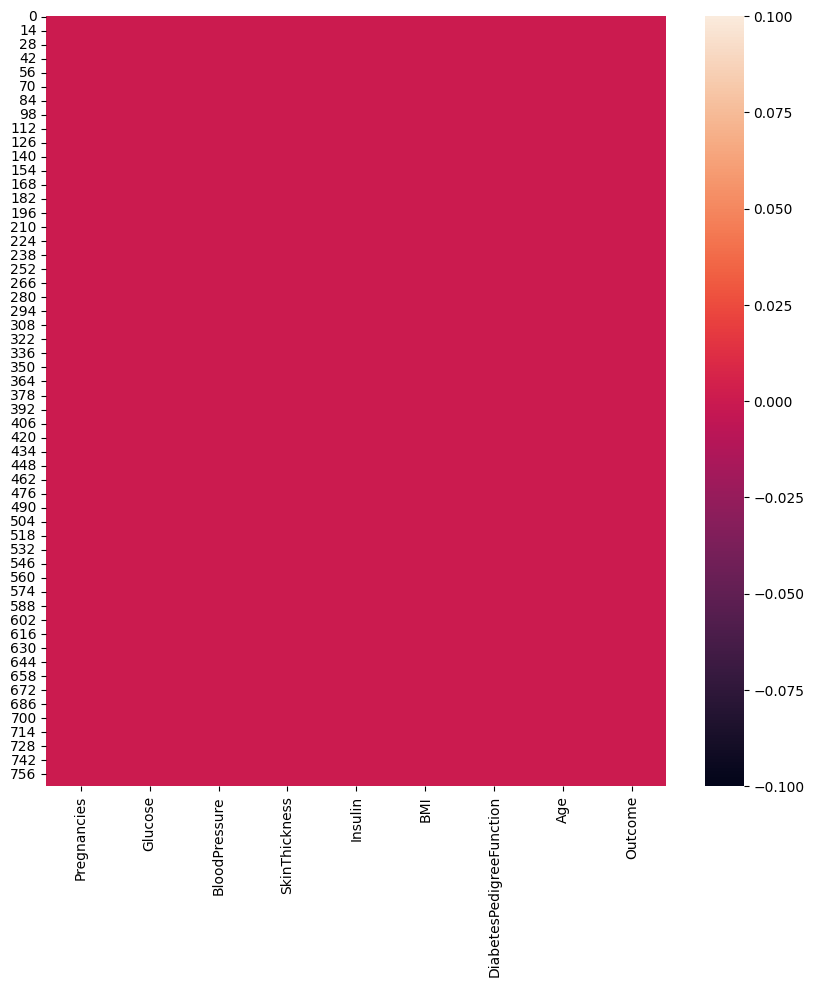

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [19]:
df.shape[0]

768

Show Null value Percentance

In [20]:
total=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data.head(10)

,Total,Percent
Pregnancies,0,0.0
Glucose,0,0.0
BloodPressure,0,0.0
SkinThickness,0,0.0
Insulin,0,0.0
BMI,0,0.0
DiabetesPedigreeFunction,0,0.0
Age,0,0.0
Outcome,0,0.0


Show missing data in graph

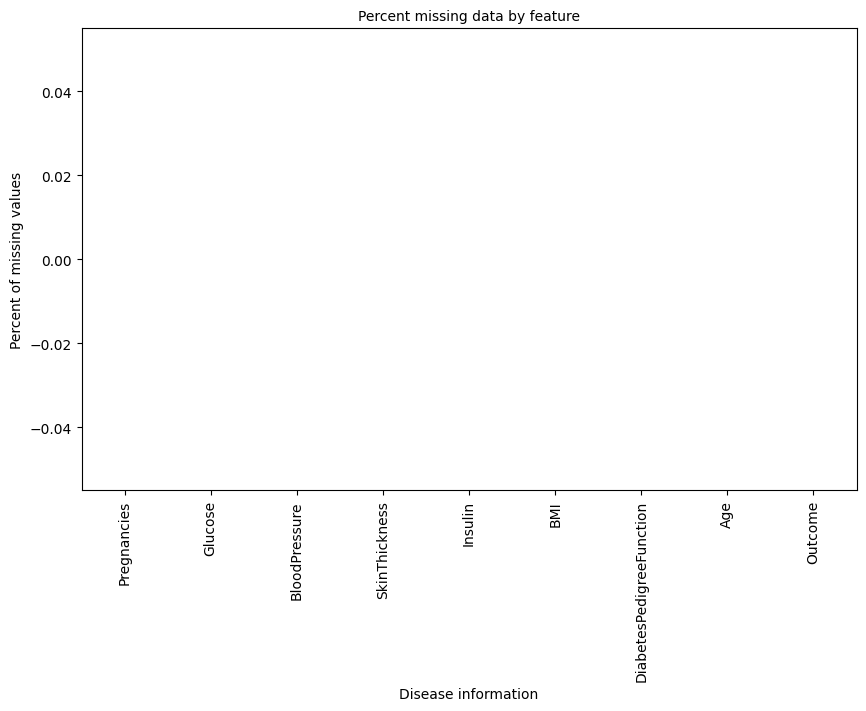

In [49]:
plt.subplots(figsize=(10, 6))
plt.xticks(rotation=90)#90 degree te rotation hobe
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Disease information', fontsize=10)
plt.ylabel('Percent of missing values', fontsize=10)
plt.title('Percent missing data by feature', fontsize=10)
plt.show()

Before SMOTE

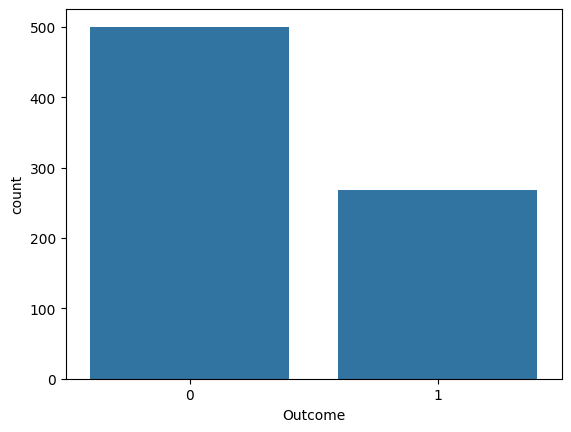

In [25]:
sns.countplot(x='Outcome',data=df)
plt.show()

After SMOTE

In [28]:
from imblearn.over_sampling import SMOTE

# Define x and y using your dataset (df) and the target column ('Outcome')
x = df.drop('Outcome', axis=1)
y = df['Outcome']

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

print("Shape of original features (x):", x.shape)
print("Shape of resampled features (x_resampled):", x_resampled.shape)
print("Shape of original target (y):", y.shape)
print("Shape of resampled target (y_resampled):", y_resampled.shape)

# Display the value counts of the resampled target variable
print("\nValue counts of the resampled 'Outcome' column:")
print(y_resampled.value_counts())

Shape of original features (x): (768, 8)
Shape of resampled features (x_resampled): (1000, 8)
Shape of original target (y): (768,)
Shape of resampled target (y_resampled): (1000,)

Value counts of the resampled 'Outcome' column:
Outcome
1    500
0    500
Name: count, dtype: int64


After SMOTE in graph

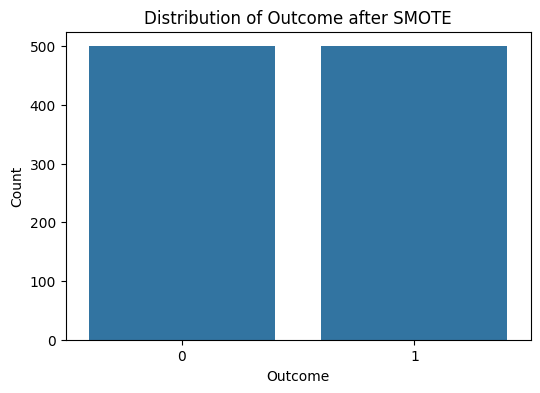

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the value counts of the resampled target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled)
plt.title('Distribution of Outcome after SMOTE')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

check Numerical Value

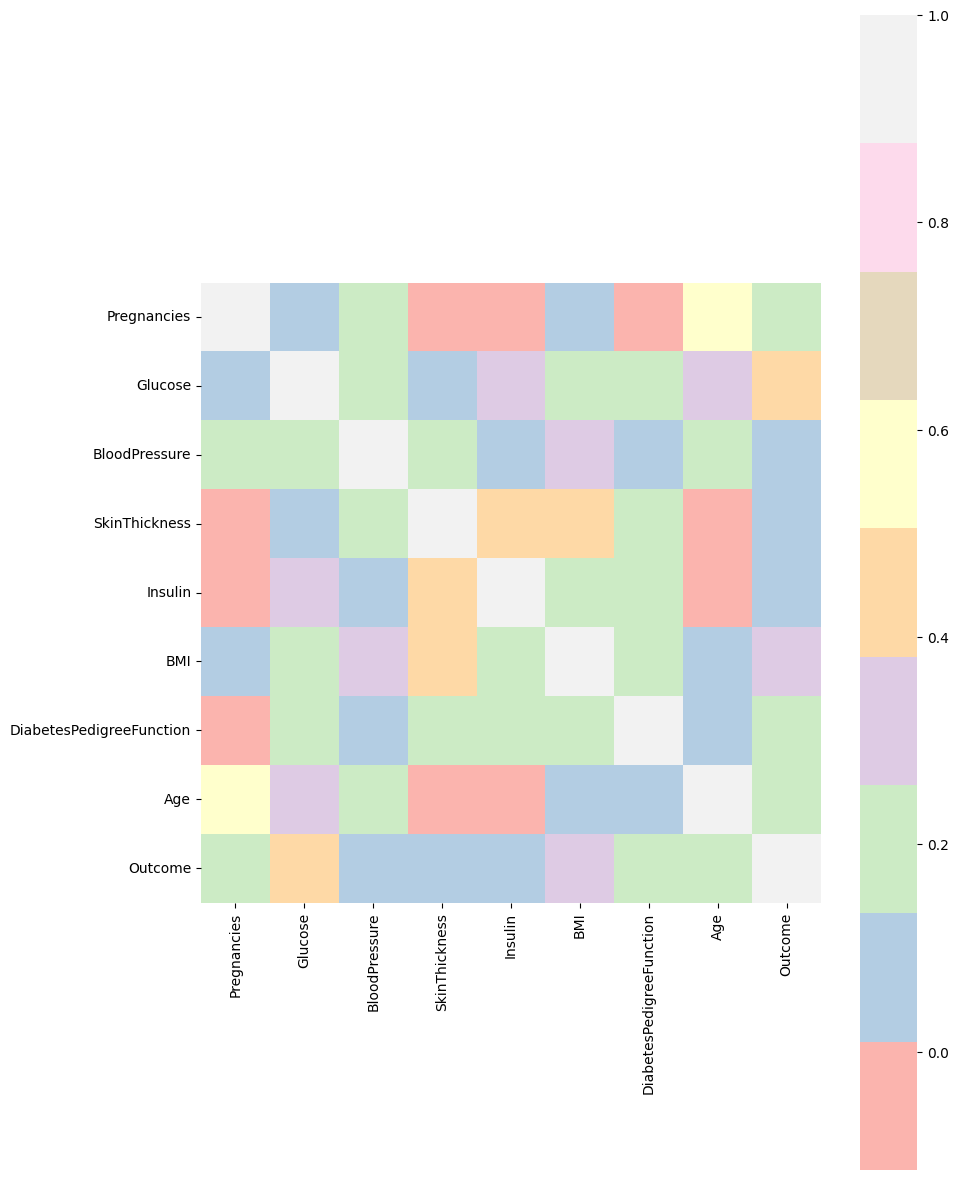

In [29]:
numerical_df = df.select_dtypes(include=['number'])  # This selects only numerical columns
corrmat = numerical_df.corr()
plt.subplots(figsize=(10,15))
sns.heatmap(corrmat,cmap="Pastel1", square=True);

correlation analysis

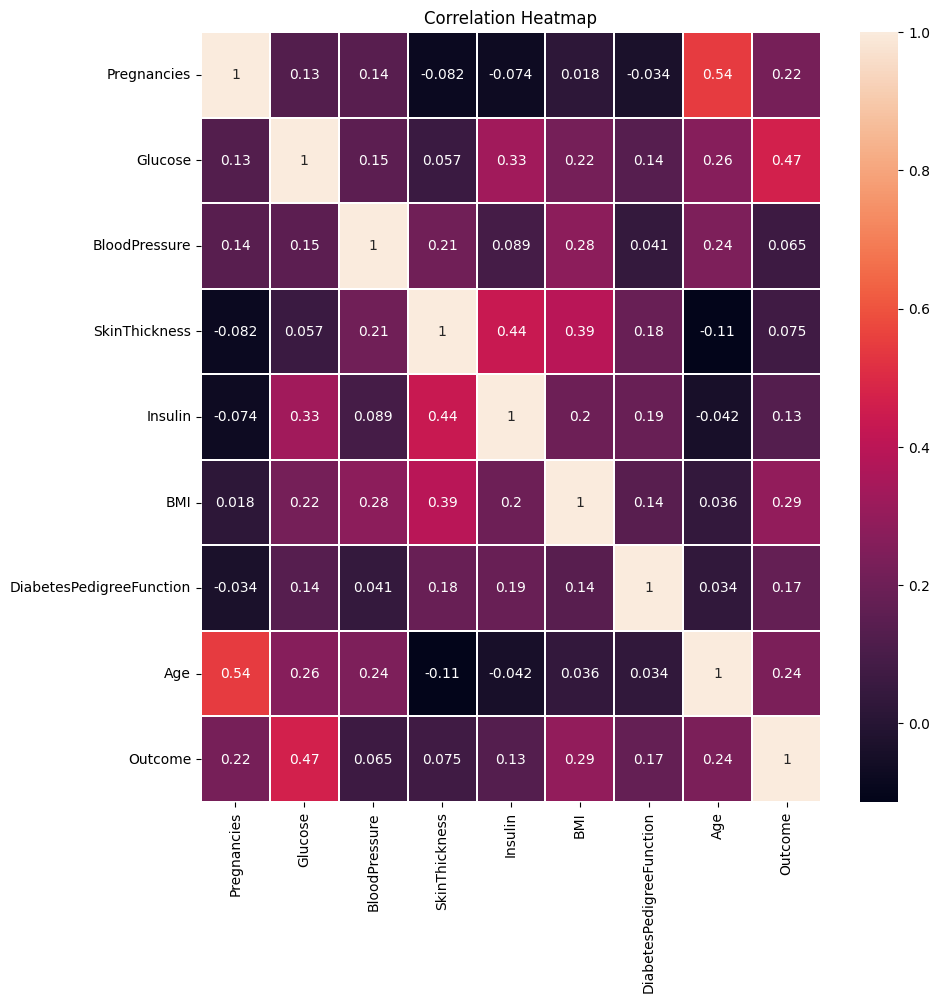

In [30]:
# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=['number']).columns
numerical_df = df[numerical_features]

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='rocket', linewidth=0.01)
plt.title("Correlation Heatmap")
plt.show()

Train Data

In [32]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


Test data

In [33]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


Models Run------------------------------------>

Confusion Matrix:
[[147  56]
 [ 36 161]]


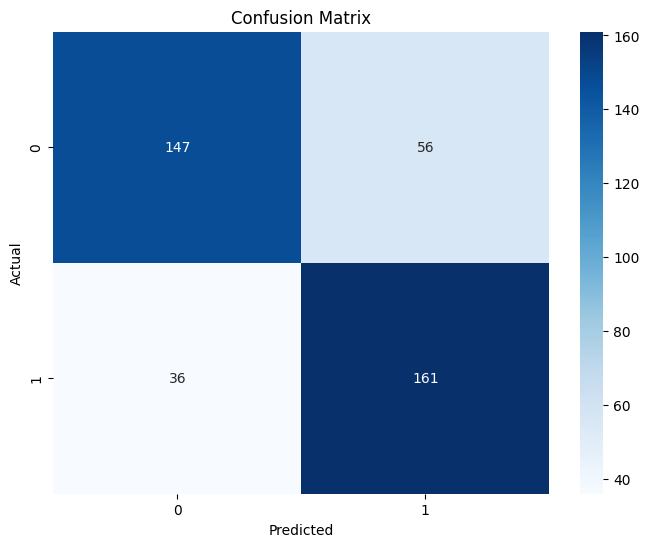


Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       203
           1       0.74      0.82      0.78       197

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400



In [34]:


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming you have already trained an XGBoost model and made predictions
# For demonstration purposes, let's create dummy data for y_test and predictions
# Replace this with your actual model training and prediction steps

# Example: Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.4, random_state=42)

# Example: Training an XGBoost classifier
model = xgb.XGBClassifier()
model.fit(x_train, y_train)

# Example: Making predictions
predictions = model.predict(x_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, you can visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# You can also print other metrics
print("\nAccuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))


In [35]:


print("\nClassification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       203
           1       0.74      0.82      0.78       197

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400



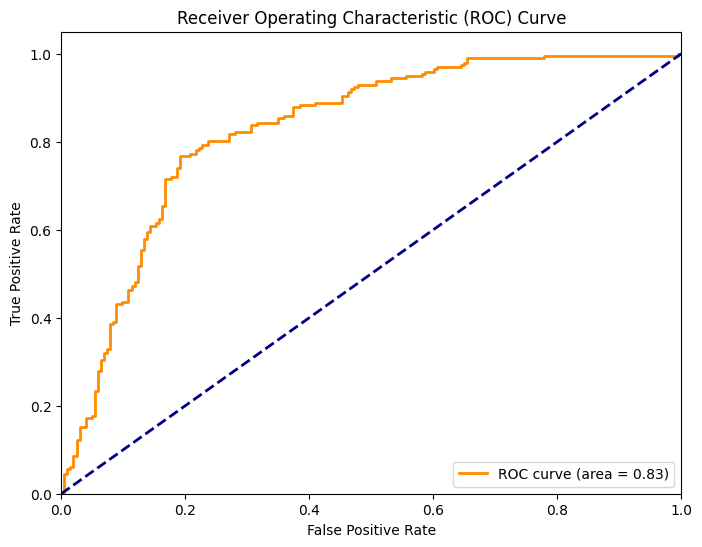


AUC: 0.83


In [36]:
# prompt: ROC

from sklearn.metrics import roc_curve, roc_auc_score


if hasattr(model, "predict_proba"):
    # Get probabilities for each class
    y_pred_proba = model.predict_proba(x_test)[:, 1]  # Probability of the positive class
else:
    # If predict_proba is not available, try decision_function (for models like SVM)
    # Or, you might need to use a model that provides probabilities
    try:
        y_pred_proba = model.decision_function(x_test)
    except AttributeError:
        print("Model does not have predict_proba or decision_function.")
        # You might need to handle this case or choose a different model

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"\nAUC: {roc_auc:.2f}")

In [37]:


from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
# Here, we use 5 folds (cv=5) and 'accuracy' as the scoring metric.
# You can change the number of folds and scoring metric as needed.
scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean cross-validation accuracy:", scores.mean())
print("Standard deviation of cross-validation accuracy:", scores.std())

Cross-validation scores: [0.72077922 0.72727273 0.72077922 0.81699346 0.71895425]
Mean cross-validation accuracy: 0.7409557762498938
Standard deviation of cross-validation accuracy: 0.038124033905643596



Feature Importances:
                    Feature  Importance
1                   Glucose    0.224556
7                       Age    0.197033
5                       BMI    0.145774
2             BloodPressure    0.099176
3             SkinThickness    0.093248
4                   Insulin    0.088227
6  DiabetesPedigreeFunction    0.083081
0               Pregnancies    0.068905


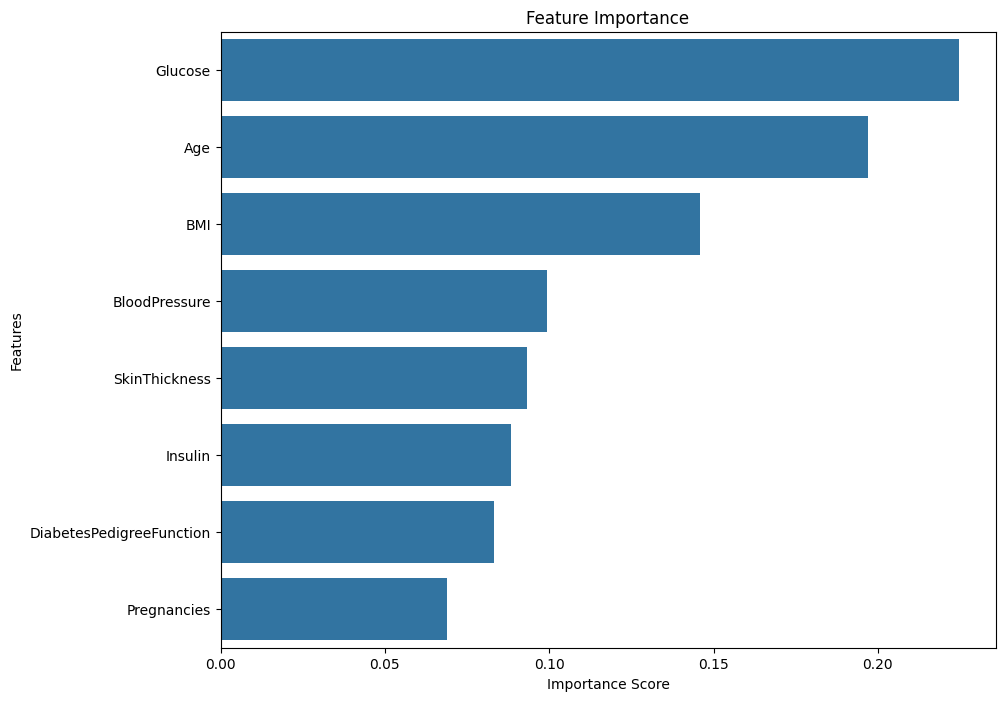

In [38]:


# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("\nFeature Importances:")
print(feature_importance_df)

# Visualize the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming you have already performed SMOTE and have x_resampled and y_resampled
# Split the resampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.4, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(x_train, y_train)

# Make predictions
predictions = model.predict(x_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("\nAccuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[152  51]
 [ 51 146]]

Accuracy: 0.745

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       203
           1       0.74      0.74      0.74       197

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400



In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming you have already performed SMOTE and have x_resampled and y_resampled
# Split the resampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.4, random_state=42)

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(x_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))

print("\nAccuracy:", accuracy_score(y_test, rf_predictions))
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))

Confusion Matrix:
[[150  53]
 [ 33 164]]

Accuracy: 0.785

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       203
           1       0.76      0.83      0.79       197

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.78       400
weighted avg       0.79      0.79      0.78       400



In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming you have already performed SMOTE and have x_resampled and y_resampled
# Split the resampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.4, random_state=42)

# Train an SVC model
svc_model = SVC(random_state=42)
svc_model.fit(x_train, y_train)

# Make predictions
svc_predictions = svc_model.predict(x_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, svc_predictions))

print("\nAccuracy:", accuracy_score(y_test, svc_predictions))
print("\nClassification Report:")
print(classification_report(y_test, svc_predictions))

Confusion Matrix:
[[151  52]
 [ 56 141]]

Accuracy: 0.73

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       203
           1       0.73      0.72      0.72       197

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.73      0.73      0.73       400



In [43]:
print("XGBoost Model Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("\nAccuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

XGBoost Model Results:
Confusion Matrix:
[[152  51]
 [ 51 146]]

Accuracy: 0.745

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       203
           1       0.74      0.74      0.74       197

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400



In [44]:
print("Logistic Regression Model Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("\nAccuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Logistic Regression Model Results:
Confusion Matrix:
[[152  51]
 [ 51 146]]

Accuracy: 0.745

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       203
           1       0.74      0.74      0.74       197

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400



In [45]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming you have already performed SMOTE and have x_resampled and y_resampled
# Split the resampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.4, random_state=42)

# Train an XGBoost classifier
model = xgb.XGBClassifier(random_state=42)
model.fit(x_train, y_train)

# Make predictions
predictions = model.predict(x_test)

# Evaluate the model
print("XGBoost Model Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("\nAccuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

XGBoost Model Results:
Confusion Matrix:
[[147  56]
 [ 36 161]]

Accuracy: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.72      0.76       203
           1       0.74      0.82      0.78       197

    accuracy                           0.77       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.77      0.77      0.77       400



In [46]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Assuming you have already performed SMOTE and have x_resampled and y_resampled
# Split the resampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.4, random_state=42)

# Define the individual classifiers
# Using the models you have already worked with
clf1 = xgb.XGBClassifier(random_state=42)
clf2 = RandomForestClassifier(random_state=42)
clf3 = SVC(probability=True, random_state=42) # SVC needs probability=True for voting='soft'
clf4 = LogisticRegression(max_iter=1000, random_state=42)


# Create the Voting Classifier
# Using 'soft' voting which averages the predicted probabilities
eclf1 = VotingClassifier(estimators=[('xgb', clf1), ('rf', clf2), ('svc', clf3), ('lr', clf4)], voting='soft')
eclf1 = eclf1.fit(x_train, y_train)
eclf1_predictions = eclf1.predict(x_test)

# Evaluate the Voting Classifier
print("Voting Classifier Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, eclf1_predictions))

print("\nAccuracy:", accuracy_score(y_test, eclf1_predictions))
print("\nClassification Report:")
print(classification_report(y_test, eclf1_predictions))

Voting Classifier Results:
Confusion Matrix:
[[149  54]
 [ 32 165]]

Accuracy: 0.785

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.78       203
           1       0.75      0.84      0.79       197

    accuracy                           0.79       400
   macro avg       0.79      0.79      0.78       400
weighted avg       0.79      0.79      0.78       400



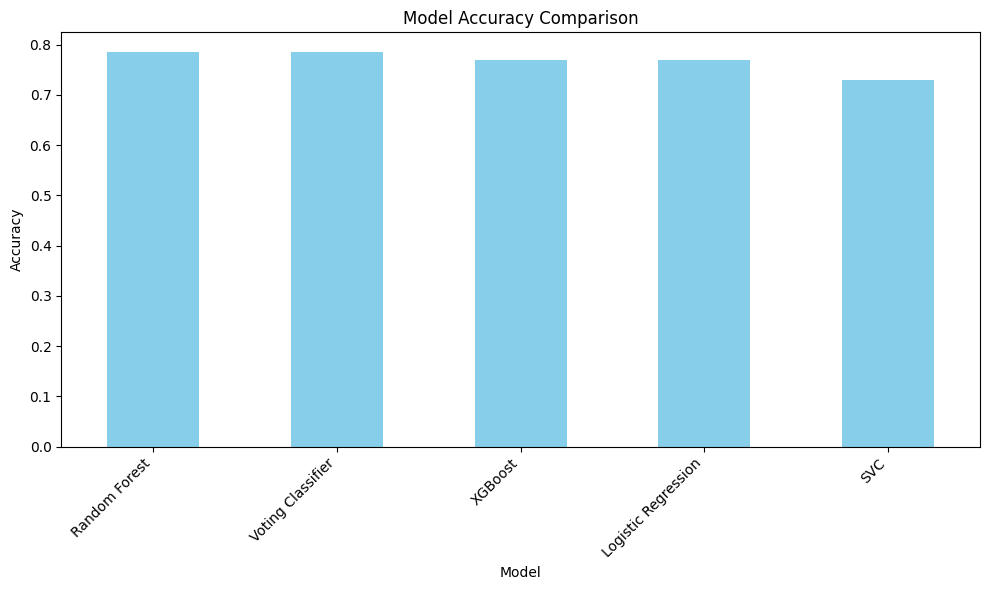

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have the accuracy scores for each model
# Replace these with the actual accuracy scores from your model evaluations
model_names = ['XGBoost', 'Logistic Regression', 'Random Forest', 'SVC', 'Voting Classifier']
accuracy_scores = [
    accuracy_score(y_test, model.predict(x_test)), # XGBoost (assuming 'model' is the last trained XGBoost)
    accuracy_score(y_test, predictions),  # Logistic Regression (assuming 'predictions' are from the last LR model)
    accuracy_score(y_test, rf_predictions), # Random Forest
    accuracy_score(y_test, svc_predictions), # SVC
    accuracy_score(y_test, eclf1_predictions) # Voting Classifier
]

# Create a pandas Series for easy plotting
accuracy_series = pd.Series(accuracy_scores, index=model_names)

# Sort the accuracies for better visualization
accuracy_series = accuracy_series.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
accuracy_series.plot(kind='bar', color='skyblue')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
# plt.ylim(0.8, 1.0) # Set y-limit for better visualization of differences
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()